In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
df.shape

(1000, 17)

In [5]:
len(df['gross income'].unique())

990

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Q1

### Star model

In [ ]:
customers_dim_star = df[['Customer type', 'Gender']].drop_duplicates().reset_index(drop=True)
customers_dim_star['customer_id'] = customers_dim_star.index
customers_dim_star



,Customer type,Gender,customer_id
0,Member,Female,0
1,Normal,Female,1
2,Normal,Male,2
3,Member,Male,3


In [7]:
# product_dim_star = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)
product_dim_star = df[['Product line', 'Unit price']].drop_duplicates().reset_index(drop=True)

product_dim_star['product_id'] = product_dim_star.index
product_dim_star


,Product line,Unit price,product_id
0,Health and beauty,74.69,0
1,Electronic accessories,15.28,1
2,Home and lifestyle,46.33,2
3,Health and beauty,58.22,3
4,Sports and travel,86.31,4
...,...,...,...
988,Health and beauty,40.35,988
989,Home and lifestyle,97.38,989
990,Food and beverages,31.84,990
991,Home and lifestyle,65.82,991


In [8]:
branch_dim_star = df[['Branch', 'City']].drop_duplicates().reset_index(drop=True)
branch_dim_star['branch_id'] = branch_dim_star.index
branch_dim_star


,Branch,City,branch_id
0,A,Yangon,0
1,C,Naypyitaw,1
2,B,Mandalay,2


I converted Date to datetime structure :)

In [31]:
datetime_dim_star = df[['Date', 'Time']].drop_duplicates().reset_index(drop=True)
datetime_dim_star["Date"] = pd.to_datetime(datetime_dim_star["Date"])
# datetime_dim_star["Time"] = pd.to_datetime(datetime_dim_star["Time"])

datetime_dim_star['datetime_id'] = datetime_dim_star.index
datetime_dim_star


,Date,Time,datetime_id
0,2019-01-05,13:08,0
1,2019-03-08,10:29,1
2,2019-03-03,13:23,2
3,2019-01-27,20:33,3
4,2019-02-08,10:37,4
...,...,...,...
989,2019-01-29,13:46,989
990,2019-03-02,17:16,990
991,2019-02-09,13:22,991
992,2019-02-22,15:33,992


In [10]:
financial_dim_star = df[['Tax 5%', 'Total', 'gross margin percentage', 'gross income']].drop_duplicates().reset_index(drop=True)
financial_dim_star['financial_id'] = financial_dim_star.index
financial_dim_star

,Tax 5%,Total,gross margin percentage,gross income,financial_id
0,26.1415,548.9715,4.761905,26.1415,0
1,3.8200,80.2200,4.761905,3.8200,1
2,16.2155,340.5255,4.761905,16.2155,2
3,23.2880,489.0480,4.761905,23.2880,3
4,30.2085,634.3785,4.761905,30.2085,4
...,...,...,...,...,...
985,2.0175,42.3675,4.761905,2.0175,985
986,48.6900,1022.4900,4.761905,48.6900,986
987,1.5920,33.4320,4.761905,1.5920,987
988,3.2910,69.1110,4.761905,3.2910,988


In [11]:
payment_dim_star = df[['Payment']].drop_duplicates().reset_index(drop=True)
payment_dim_star['payment_id'] = payment_dim_star.index
payment_dim_star

,Payment,payment_id
0,Ewallet,0
1,Cash,1
2,Credit card,2


In [33]:
# Start with base fact table
fact_table = df.copy()

# Map foreign keys
fact_table = fact_table.merge(customers_dim_star, on=['Customer type', 'Gender'])
fact_table = fact_table.merge(product_dim_star, on=['Product line', 'Unit price'])
fact_table = fact_table.merge(branch_dim_star, on=['Branch', 'City'])

fact_table = fact_table.merge(datetime_dim_star, on=['Time'])
fact_table = fact_table.merge(financial_dim_star, on=['Tax 5%', 'Total', 'gross margin percentage', 'gross income'])
fact_table = fact_table.merge(payment_dim_star, on=['Payment'])

# Keep only necessary columns for fact table
fact_table_star = fact_table[['Invoice ID', 'customer_id', 'product_id', 'branch_id', 'datetime_id', 
                              'financial_id', 'payment_id', 'Quantity', 'cogs', 'Rating']]
fact_table_star

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1
1,750-67-8428,0,0,0,782,0,0,7,522.83,9.1
2,226-31-3081,1,1,1,1,1,1,5,76.40,9.6
3,226-31-3081,1,1,1,367,1,1,5,76.40,9.6
4,631-41-3108,2,2,0,2,2,2,7,324.31,7.4
...,...,...,...,...,...,...,...,...,...,...
2558,727-02-1313,3,990,0,991,987,1,1,31.84,7.7
2559,347-56-2442,2,991,0,726,988,1,1,65.82,4.1
2560,347-56-2442,2,991,0,992,988,1,1,65.82,4.1
2561,849-09-3807,0,992,0,533,989,1,7,618.38,6.6


### crating snowflake model 

????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????
اون موردی که برای ستاره ای گفتی درسته ولی اگه به صورت اینکه بعضی مفاهیم میشه باهم گذاشت اینا هم در نظر بگیری یه سری موارد دیگه هم دستت میاد

In [52]:
# Create a product_line_dim table (snowflake approach)
product_line_dim = df[['Product line']].drop_duplicates().reset_index(drop=True)
product_line_dim['product_line_id'] = product_line_dim.index
product_line_dim

,Product line,product_line_id
0,Health and beauty,0
1,Electronic accessories,1
2,Home and lifestyle,2
3,Sports and travel,3
4,Food and beverages,4
5,Fashion accessories,5


### Memory usage

#### Star 

The values are in units of bytes.

In [ ]:
fact_table_star.memory_usage(deep=True).sum()
+payment_dim_star.memory_usage(deep = True).sum()
+financial_dim_star.memory_usage(deep=True).sum()
+datetime_dim_star.memory_usage(deep=True).sum()
+branch_dim_star.memory_usage(deep=True).sum()
+customers_dim_star.memory_usage(deep=True).sum()
+product_dim_star.memory_usage(deep=True).sum()



91022

## Q2

### star model

In [16]:
import time


start_time = time.time()

# Merging fact_table_star with product_dim_star on product_id
merged_df_star = fact_table_star.merge(product_dim_star, on="product_id")

# Merging with financial_dim_star on financial_id
merged_df_star = merged_df_star.merge(financial_dim_star, on="financial_id")

# Grouping by Product line and summing the Total
total_per_product_line_star = merged_df_star.groupby("Product line")["Total"].sum().reset_index()

# End timing
end_time = time.time()
execution_time_star = end_time - start_time

# Display result and execution time
print(execution_time_star)
total_per_product_line_star

0.011178970336914062


,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


### snowflake model

## Q3

### A

In [42]:
type(datetime_dim_star['Date'][0])

ymd_sale = fact_table_star.merge(datetime_dim_star, on="datetime_id").merge(financial_dim_star , on="financial_id")

ymd_sale["Year"] = ymd_sale["Date"].dt.year
ymd_sale["Month"] = ymd_sale["Date"].dt.month


# Summation of selling at Year level
yearly_sales = ymd_sale.groupby("Year")["Total"].sum().reset_index()

# Summation of selling at Month level
monthly_sales = ymd_sale.groupby("Month")["Total"].sum().reset_index()


# Display results and execution time
print(yearly_sales)
print(monthly_sales)


   Year        Total
0  2019  824790.5925
   Month        Total
0      1  316628.0355
1      2  249782.6730
2      3  258379.8840


## Q4

In [48]:
ymd_sale

,Invoice ID,customer_id,product_id,branch_id,datetime_id,financial_id,payment_id,Quantity,cogs,Rating,Date,Time,Tax 5%,Total,gross margin percentage,gross income,Year,Month,Day
0,750-67-8428,0,0,0,0,0,0,7,522.83,9.1,2019-01-05,13:08,26.1415,548.9715,4.761905,26.1415,2019,1,5
1,750-67-8428,0,0,0,782,0,0,7,522.83,9.1,2019-02-24,13:08,26.1415,548.9715,4.761905,26.1415,2019,2,24
2,226-31-3081,1,1,1,1,1,1,5,76.40,9.6,2019-03-08,10:29,3.8200,80.2200,4.761905,3.8200,2019,3,8
3,226-31-3081,1,1,1,367,1,1,5,76.40,9.6,2019-03-24,10:29,3.8200,80.2200,4.761905,3.8200,2019,3,24
4,631-41-3108,2,2,0,2,2,2,7,324.31,7.4,2019-03-03,13:23,16.2155,340.5255,4.761905,16.2155,2019,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,727-02-1313,3,990,0,991,987,1,1,31.84,7.7,2019-02-09,13:22,1.5920,33.4320,4.761905,1.5920,2019,2,9
2559,347-56-2442,2,991,0,726,988,1,1,65.82,4.1,2019-03-16,15:33,3.2910,69.1110,4.761905,3.2910,2019,3,16
2560,347-56-2442,2,991,0,992,988,1,1,65.82,4.1,2019-02-22,15:33,3.2910,69.1110,4.761905,3.2910,2019,2,22
2561,849-09-3807,0,992,0,533,989,1,7,618.38,6.6,2019-03-11,13:28,30.9190,649.2990,4.761905,30.9190,2019,3,11


In [ ]:
ymd_sale["Day"] = ymd_sale["Date"].dt.day

day_branch_sales = ymd_sale.groupby(["Day" , "branch_id"])["Total"].sum().reset_index()

print(day_branch_sales)


    Day  branch_id       Total
0     1          0   8406.8985
1     1          1   8228.8395
2     1          2   7452.3960
3     2          0   6624.9435
4     2          1  10181.7870
..  ...        ...         ...
88   30          1   9089.8605
89   30          2   5784.0825
90   31          0   1806.3570
91   31          1   7435.3650
92   31          2   4233.0015

[93 rows x 3 columns]


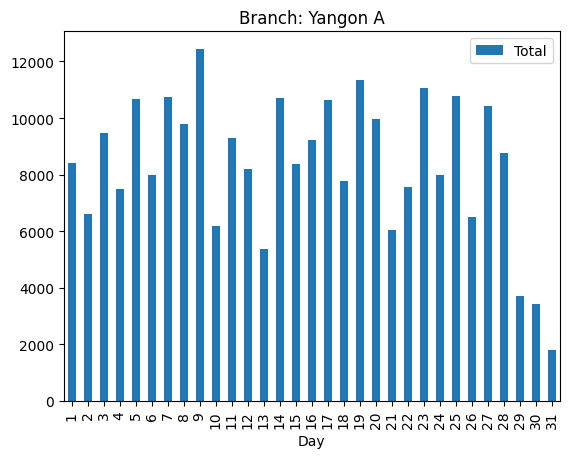

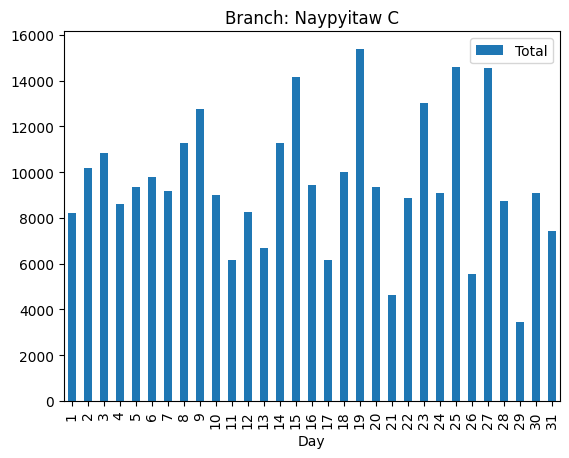

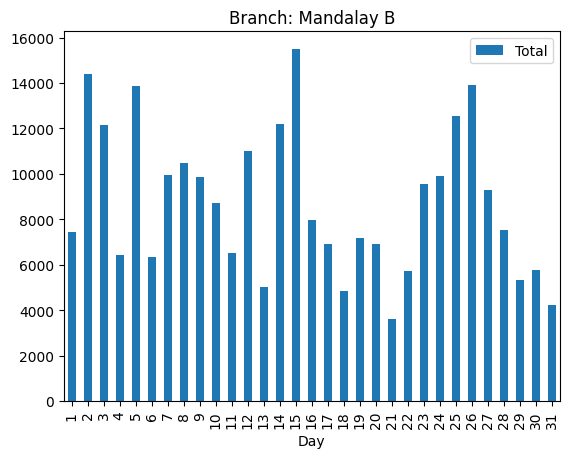

In [70]:
import matplotlib.pyplot as plt

day_branch_sales = day_branch_sales.merge(branch_dim_star, on='branch_id', how='left')

# Now plot using City and Branch for the title
for branch_id, group in day_branch_sales.groupby("branch_id"):
    # Get the City and Branch names
    city_branch = group['City'].iloc[0] + " " + group['Branch'].iloc[0]
    
    # Plot the bar chart with the updated title
    ax = group.plot(kind="bar", x="Day", y="Total", title=f"Branch: {city_branch}")
    plt.show()


ValueError: cannot insert branch_id, already exists